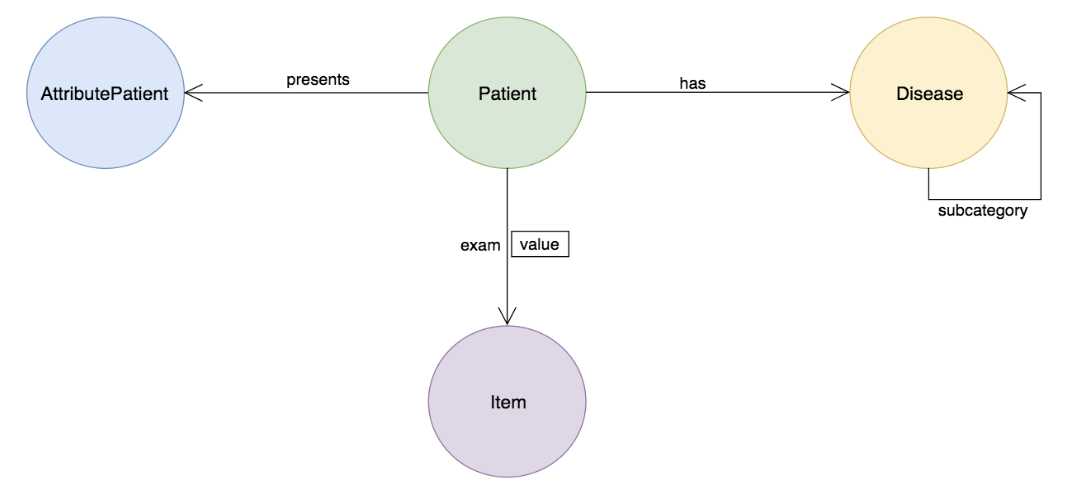

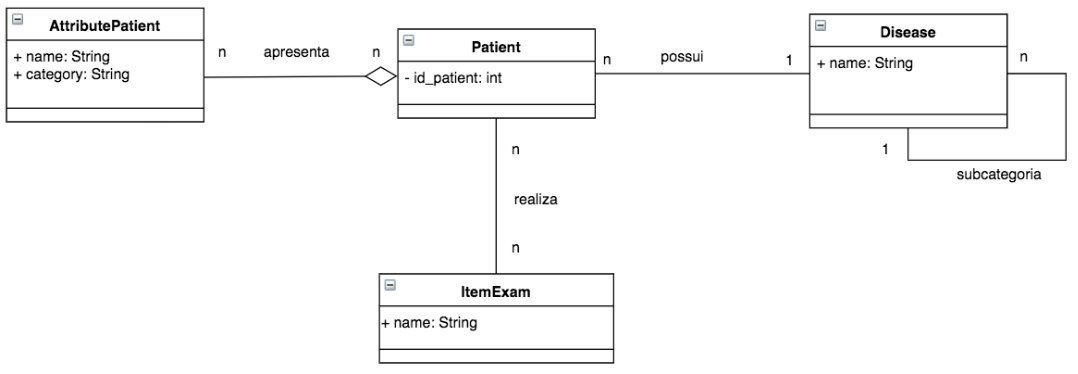

DISEASE (id_disease, name)

ITEM (id_item, name)

PATIENT (id_patient)

ATTRIBUTE_PATIENT(id_attribute, name)

EXAM(id_patient, id_item, value)
CHE: id_patient para PATIENT(id_patient)
CHE: id_item para ITEM(id_item)

HAS(id_patient, id_disease)
CHE: id_patient para PATIENT(id_patient)
CHE: id_disease para DISEASE(id_disease)

PRESENTS(id_patient, id_attributte)
CHE: id_patient para PATIENT(id_patient)
CHE: id_attributte para ATTRIBUTE_PATIENT(id_attributte)

# Queries de Criação do Grafo

-- Doencas


LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/disease4.csv' AS line
CREATE (:Disease { name: line.category, id: line.id_disease})


LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/disease3.csv' AS line
CREATE (:Disease { name: line.name})


LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/disease4.csv' AS line
MATCH (d1:Disease {name: line.name})
MATCH (d2:Disease {id: line.id_disease})
CREATE (d2)-[:Super]->(d1)

-- Paciente:


LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/patient.csv'
AS line
CREATE (:PatientAll { id: line.id_patient})


LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/patient.csv'
AS line
MATCH (p1:PatientAll {id: line.id_patient}) WHERE (line.id_disease) =~ 'dis.*'
CREATE (p2: Patient {id: line.id_patient})


MATCH(p: PatientAll)
DELETE (p)


-- Paciente -> Doenca


LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/patient.csv' AS line
MATCH (p:Patient { id: line.id_patient})
MATCH (d:Disease {id: line.id_disease})
CREATE (p)-[:Has]->(d)


-- Itens


LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/item3.csv'
AS line
CREATE (:Item {id: line.id_item, name: line.name})


-- Paciente -> Item


LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/item_novo3.csv'
AS line
MATCH(p: Patient {id: line.id_patient})
MATCH(i: Item {name: line.name})
WHERE line.result = 't'
CREATE (p)-[:HasItem{value: line.value}]->(i)


-- Atributos

LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/attribute.csv'
AS line
CREATE (:Attribute {name: line.name})

-- Aresta Atributos gerais
LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/aresta_atributo.csv' AS line MATCH(p: Patient {id: line.idpaciente}) MATCH(a: Attribute {name: line.name}) WHERE line.result = 't' CREATE (p)-[:HasAttribute]->(a)

-- Aresta Atributo Idade:
LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/aresta_atributo.csv' AS line MATCH(p: Patient {id: line.idpaciente}) MATCH(a: Attribute {name: line.name}) WHERE line.name = 'age' and line.result <> '?'
CREATE (p)-[:HasAttribute {value: line.result}]->(a)

-- Aresta Atributo Sexo feminino
LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/aresta_atributo.csv' AS line MATCH(p: Patient {id: line.idpaciente}) MATCH(a: Attribute {name: 'female'}) WHERE line.name = 'sex' and line.result = 'F'
CREATE (p)-[:HasAttribute]->(a)

-- Aresta Atributo Sexo masculino
LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/aresta_atributo.csv' AS line MATCH(p: Patient {id: line.idpaciente}) MATCH(a: Attribute {name: 'male'}) WHERE line.name = 'sex' and line.result = 'M'
CREATE (p)-[:HasAttribute]->(a)


# Queries de Análise

## 1. 

-- Média da idade de pacientes com hipertireoidismo
```
MATCH n=(a:Patient)-[h:Has]->(d:Disease)-[s:Super]->(:Disease {name: 'hyperthyroid'})
MATCH m=(a:Patient)-[ha:HasAttribute]->(:Attribute {name: 'age'})
RETURN avg(toFloat(ha.value))
```
-- 51,7272727272727



-- Média da idade de pacientes com hipotireoidismo
```
MATCH n=(a:Patient)-[h:Has]->(d:Disease)-[s:Super]->(:Disease {name: 'hypothyroid'})
MATCH m=(a:Patient)-[ha:HasAttribute]->(:Attribute {name: 'age'})
RETURN avg(toFloat(ha.value))
```
-- 50,8727272727272

## 2.

-- Média da idade de pacientes com hipertireoidismo com bócio
```
MATCH n=(a:Patient)-[h:Has]->(:Disease {name:'goitre'})-[s:Super]->(:Disease {name: 'hyperthyroid'})
MATCH m=(a:Patient)-[ha:HasAttribute]->(:Attribute {name: 'age'})
RETURN avg(toFloat(ha.value))
```
-- 42,1428571428571


-- Média da idade de pacientes com hipertireoidismo com t3 tóxico
```
MATCH n=(a:Patient)-[h:Has]->(:Disease {name:'T3 toxic'})-[s:Super]->(:Disease {name: 'hyperthyroid'})
MATCH m=(a:Patient)-[ha:HasAttribute]->(:Attribute {name: 'age'})
RETURN avg(toFloat(ha.value))
```
-- 59,2499999999999


-- Média da idade de pacientes com hipertireoidismo do terceiro tipo, que não está nas categorias anteriores
```
MATCH n=(a:Patient)-[h:Has]->(:Disease {id:'dis3'})-[s:Super]->(:Disease {name: 'hyperthyroid'})
MATCH m=(a:Patient)-[ha:HasAttribute]->(:Attribute {name: 'age'})
RETURN avg(toFloat(ha.value))
```
-- 51,8387096774193


-- Média da idade de pacientes com hipotireoidismo primário 
```
MATCH n=(a:Patient)-[h:Has]->(:Disease {name:'primary'})-[s:Super]->(:Disease {name: 'hypothyroid'})
MATCH m=(a:Patient)-[ha:HasAttribute]->(:Attribute {name: 'age'})
RETURN avg(toFloat(ha.value))
```
-- 50,6718749999999


-- Média da idade de pacientes com hipotireoidismo secundário
```
MATCH n=(a:Patient)-[h:Has]->(:Disease {name:'secondary'})-[s:Super]->(:Disease {name: 'hypothyroid'})
MATCH m=(a:Patient)-[ha:HasAttribute]->(:Attribute {name: 'age'})
RETURN avg(toFloat(ha.value))
```
-- 43,5


-- Média da idade de pacientes com hipotireoidismo compensado
```
MATCH n=(a:Patient)-[h:Has]->(:Disease {name:'compensated'})-[s:Super]->(:Disease {name: 'hypothyroid'})
MATCH m=(a:Patient)-[ha:HasAttribute]->(:Attribute {name: 'age'})
RETURN avg(toFloat(ha.value))
```
-- 51,051948051948

## Resultados

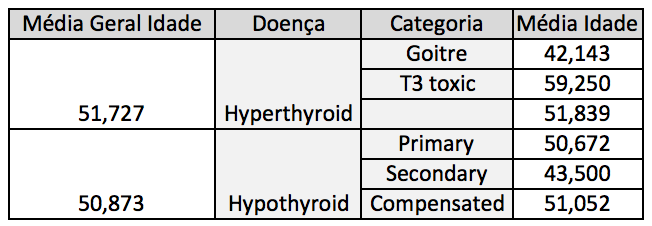

## 3. 

-- Quantidade de pessoas que possuem hipotireoidismo com menos de 30 anos e sua categoria
```
MATCH n=(a:Patient)-[h:Has]->(d:Disease)-[s:Super]->(:Disease {name: 'hypothyroid'})
MATCH m=(a:Patient)-[ha:HasAttribute]->(:Attribute {name: 'age'}) WHERE (toInteger(ha.value)) < 30
RETURN n, m
```

-- Quantidade de pessoas que possuem hipotireoidismo com mais de 50 anos e sua categoria
```
MATCH n=(a:Patient)-[h:Has]->(d:Disease)-[s:Super]->(:Disease {name: 'hypothyroid'})
MATCH m=(a:Patient)-[ha:HasAttribute]->(:Attribute {name: 'age'}) WHERE (toInteger(ha.value)) > 50
RETURN n, m
```

-- Quantidade de pessoas que possuem hipertireoidismo com menos de 30 anos e sua categoria
```
MATCH n=(a:Patient)-[h:Has]->(d:Disease)-[s:Super]->(:Disease {name: 'hyperthyroid'})
MATCH m=(a:Patient)-[ha:HasAttribute]->(:Attribute {name: 'age'}) WHERE (toInteger(ha.value)) < 30
RETURN n, m
```

-- Quantidade de pessoas que possuem hipertireoidismo com mais de 50 anos e sua categoria
```
MATCH n=(a:Patient)-[h:Has]->(d:Disease)-[s:Super]->(:Disease {name: 'hyperthyroid'})
MATCH m=(a:Patient)-[ha:HasAttribute]->(:Attribute {name: 'age'}) WHERE (toInteger(ha.value)) > 50
RETURN n, m
```

## 4.
-- As pessoas com tumor na maioria são classificados com hipo ou hipertireoidismo? E qual a categoria? 
```
MATCH n=(a:Patient)-[h:Has]->(d:Disease)-[s:Super]->(D:Disease)
MATCH m=(a:Patient)-[h1:HasAttribute]->(:Attribute {name: 'tumor'})
RETURN m, n
```

## 5.
-- As pessoas com transtorno psiquiátrico estão mais associadas a qual doença? 

```
MATCH n=(a:Patient)-[h:Has]->(d:Disease)-[s:Super]->(D:Disease)
MATCH m=(a:Patient)-[h1:HasAttribute]->(:Attribute {name: 'psych'})
RETURN m, n
```

## 6.

-- Há mais homens ou mulheres com transtorno psiquiátrico e distúrbio de tireoide?


```
MATCH n=(a:Patient)-[h:Has]->(d:Disease)-[s:Super]->(D:Disease)
MATCH m=(a:Patient)-[h1:HasAttribute]->(:Attribute {name: 'psych'})
MATCH o=(a:Patient)-[h2:HasAttribute]->(:Attribute {name: 'male'})
RETURN count(a)
```
-- homens = 5


```
MATCH n=(a:Patient)-[h:Has]->(d:Disease)-[s:Super]->(D:Disease)
MATCH m=(a:Patient)-[h1:HasAttribute]->(:Attribute {name: 'psych'})
MATCH o=(a:Patient)-[h2:HasAttribute]->(:Attribute {name: 'female'})
RETURN count(a)
```
-- mulheres = 2



## 7.

-- A gravidez está mais associadas a qual doença? 
```
MATCH n=(a:Patient)-[h:Has]->(d:Disease)-[s:Super]->(D:Disease)
MATCH m=(a:Patient)-[h1:HasAttribute]->(:Attribute {name: 'pregnant'})
RETURN m, n
```

## 8.

-- Qual distúrbio as mulheres mais possuem? 
```
MATCH n=(a:Patient)-[h:Has]->(d:Disease)-[s:Super]->(D:Disease)
MATCH m=(a:Patient)-[h1:HasAttribute]->(:Attribute {name: 'female'})
RETURN m, n
```
```
MATCH n=(a:Patient)-[h:Has]->(d:Disease)-[s:Super]->(:Disease {name: 'hypothyroid'})
MATCH m=(a:Patient)-[h1:HasAttribute]->(:Attribute {name: 'female'})
RETURN count(a)
```
-- hipo = 158

```
MATCH n=(a:Patient)-[h:Has]->(d:Disease)-[s:Super]->(:Disease {name: 'hyperthyroid'})
MATCH m=(a:Patient)-[h1:HasAttribute]->(:Attribute {name: 'female'})
RETURN count(a)
```
-- hiper = 64


## 9. 

-- Qual distúrbio os homens mais possuem? 
```
MATCH n=(a:Patient)-[h:Has]->(d:Disease)-[s:Super]->(D:Disease)
MATCH m=(a:Patient)-[h1:HasAttribute]->(:Attribute {name: 'male'})
RETURN m, n
```
```
MATCH n=(a:Patient)-[h:Has]->(d:Disease)-[s:Super]->(:Disease {name: 'hypothyroid'})
MATCH m=(a:Patient)-[h1:HasAttribute]->(:Attribute {name: 'male'})
RETURN count(a)
```
— hipo = 53

```
MATCH n=(a:Patient)-[h:Has]->(d:Disease)-[s:Super]->(:Disease {name: 'hyperthyroid'})
MATCH m=(a:Patient)-[h1:HasAttribute]->(:Attribute {name: 'male'})
RETURN count(a)
```
— hiper = 8